In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [67]:
with open('tree-of-thought-llm/src/logs/pie/gpt-3.5-turbo-1106_1.0_sample3_value3_greedy2_start0_end50.json') as f:
    data = json.load(f)

In [68]:
vals_and_gt = [[{"values": s['values'], "gt_values": s['gt_values']} for s in obj["steps"]] for obj in data]

In [69]:
vals_and_gt = np.array(vals_and_gt).flatten()

In [70]:
filtered_vals_and_gt = []

for obj in vals_and_gt:
    gt_vals = np.array(obj["gt_values"])
    if not np.all(np.logical_or(np.isinf(gt_vals), np.isnan(gt_vals))):
        filtered_vals_and_gt.append(obj)

In [71]:
# Python3 program to make  
# an array same to another 
# using minimum number of swap 
  
# Function returns the minimum  
# number of swaps required to  
# sort the array 
# This method is taken from below post 
# https: // www.geeksforgeeks.org/ 
# minimum-number-swaps-required-sort-array/ 
def minSwapsToSort(arr, n): 
  
    # Create an array of pairs  
    # where first element is  
    # array element and second 
    # element is position of  
    # first element 
    arrPos = [[0 for x in range(2)]  
                 for y in range(n)] 
      
    for i in range(n):     
        arrPos[i][0] = arr[i] 
        arrPos[i][1] = i 
  
    # Sort the array by array  
    # element values to get right 
    # position of every element  
    # as second element of pair. 
    arrPos.sort() 
  
    # To keep track of visited  
    # elements. Initialize all  
    # elements as not visited  
    # or false. 
    vis = [False] * (n) 
  
    # Initialize result 
    ans = 0
  
    # Traverse array elements 
    for i in range(n): 
      
        # Already swapped and corrected or 
        # already present at correct pos 
        if (vis[i] or arrPos[i][1] == i): 
            continue
  
        # Find out the number of  node in 
        # this cycle and add in ans 
        cycle_size = 0
        j = i 
          
        while (not vis[j]):         
            vis[j] = 1
  
            # Move to next node 
            j = arrPos[j][1] 
            cycle_size+= 1
         
        # Update answer by  
        # adding current cycle. 
        ans += (cycle_size - 1)   
  
    # Return result 
    return ans 

# Method returns minimum  
# number of swap to make 
# array B same as array A 
def minSwapToMakeArraySame(a, b, n): 
          
    # map to store position  
    # of elements in array B 
    # we basically store  
    # element to index mapping. 
    mp = {} 
    for i in range(n): 
        mp[b[i]] = i 
  
    # now we're storing position  
    # of array A elements 
    # in array B. 
    for i in range(n): 
        b[i] = mp[a[i]] 
  
    # Returning minimum swap  
    # for sorting in modified 
    # array B as final answer 
    return minSwapsToSort(b, n) 

In [12]:
for obj in filtered_vals_and_gt:
    vals = np.array(obj["values"])
    gt_vals = np.array(obj["gt_values"])
    val_idx = np.argsort(vals)
    gt_val_idx = np.argsort(gt_vals)

    swaps = minSwapToMakeArraySame(val_idx, gt_val_idx, len(val_idx))
    obj['swaps'] = swaps
    

(array([10., 16., 10., 18., 22., 46., 12.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

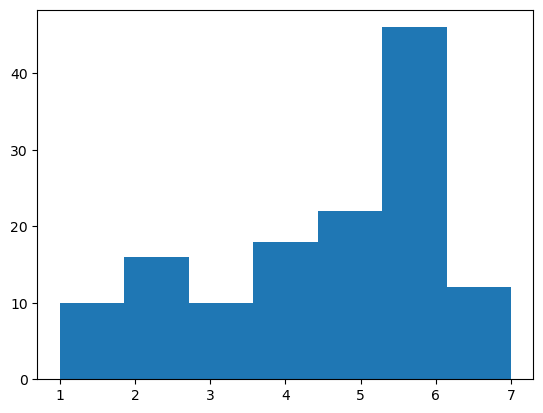

In [16]:
plt.hist([obj['swaps'] for obj in filtered_vals_and_gt], bins=7)

In [74]:
for obj in filtered_vals_and_gt:
    vals = np.array(obj["values"])
    gt_vals = np.array(obj["gt_values"])
    val_idx = np.argsort(vals)
    gt_val_idx = np.argsort(gt_vals)

    first = val_idx[0]
    second = val_idx[1]
    first_pos_in_gt = np.where(gt_val_idx == first)[0][0]
    second_pos_in_gt = np.where(gt_val_idx == second)[0][0]
    obj['gt_vs_val'] = max(first_pos_in_gt, second_pos_in_gt)

(array([ 8., 14., 25., 17., 19., 22., 29.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

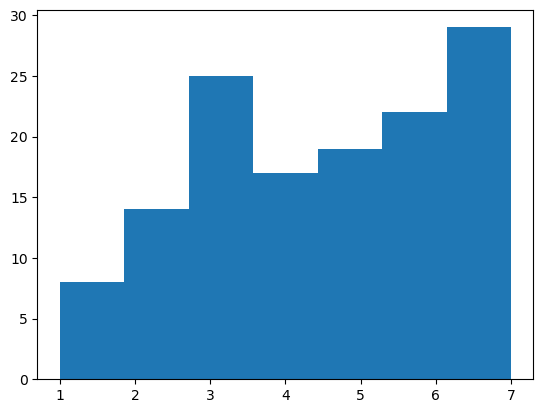

In [75]:
plt.hist([obj['gt_vs_val'] for obj in filtered_vals_and_gt], bins=7)

In [49]:
# count all 3s in values in filtered_vals_and_gt
count = 0
for obj in filtered_vals_and_gt:
    vals = np.array(obj["values"])
    count += np.sum(vals == 3)
print(count / len(filtered_vals_and_gt))

0.32608695652173914


In [50]:
# count all 3s in values in filtered_vals_and_gt
count = 0
for obj in filtered_vals_and_gt:
    vals = np.array(obj["values"])
    count += np.sum(vals == 1) == 3
print(count / len(filtered_vals_and_gt))

0.18840579710144928


In [51]:
more_filtered_vals_and_gt = []

for obj in filtered_vals_and_gt:
    vals = np.array(obj["values"])
    if not np.sum(vals == 1) == 3 and not np.sum(vals == 3) == 1:
        more_filtered_vals_and_gt.append(obj)

In [59]:
for obj in more_filtered_vals_and_gt:
    vals = np.array(obj["values"])
    gt_vals = np.array(obj["gt_values"])
    val_idx = np.argsort(vals)
    gt_val_idx = np.argsort(gt_vals)

    first = val_idx[0]
    second = val_idx[1]
    first_pos_in_gt = np.where(gt_val_idx == first)[0][0]
    second_pos_in_gt = np.where(gt_val_idx == second)[0][0]
    obj['gt_vs_val'] = max(first_pos_in_gt, second_pos_in_gt)

(array([12., 13., 14.,  8.,  7., 13.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

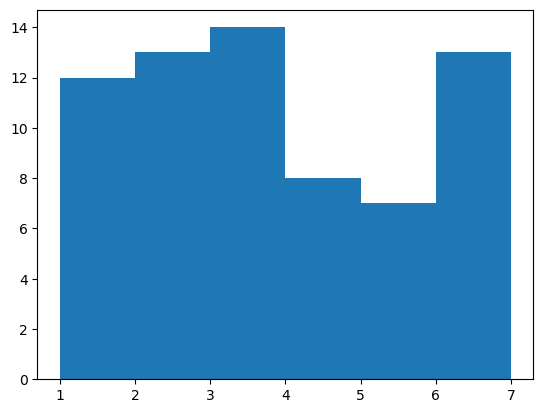

In [60]:
plt.hist([obj['gt_vs_val'] for obj in more_filtered_vals_and_gt], bins=6)